---
## The idea of gradient decent
---
Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.
Suppose you are lost in the mountains in a dense fog; you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what Gradient Descent does: it measures the local gradient of the error function with regards to the parameter vector θ, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!
Concretely, you start by filling θ with random values (this is called random initializa‐ tion), and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum.

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time. On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution. Finally, not all cost functions look like nice regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrains, making convergence to the minimum very difficult. Figure 4-6 shows the two main challenges with Gradient Descent: if the random initialization starts the algorithm on the left, then it will converge to a local mini‐ mum, which is not as good as the global minimum. If it starts on the right, then it will take a very long time to cross the plateau, and if you stop too early you will never reach the global minimum.



### Batch Gradient Descent
To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$.

- **Gradient vector of the cost function**
$$ \nabla_\theta MSE(\theta)  = \frac{2}{m} X^T\cdot \left( X\cdot\theta - y \right) $$

Once having the gradient vector, we can decide the next step as the following equation.

- **Gradient Descent step**
$$ \theta^{(next \space step)} = \theta−\eta \nabla_\theta MSE(\theta) ,$$
where $\eta$ is the learning rate.


### Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')



### Data Analysis

In [2]:
df = pd.read_csv('/Users/yihanhong/Desktop/577/dataset/LR_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Preprocessing

In [3]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')

label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

X = df.drop(['charges'], axis = 1)
y = df['charges']
y = y.to_numpy().reshape((1338, 1)) 

X_b = np.c_[np.ones((1338, 1)), X]
X_b

array([[ 1., 19.,  0., ...,  0.,  1.,  3.],
       [ 1., 18.,  1., ...,  1.,  0.,  2.],
       [ 1., 28.,  1., ...,  3.,  0.,  2.],
       ...,
       [ 1., 18.,  0., ...,  0.,  0.,  2.],
       [ 1., 21.,  0., ...,  0.,  0.,  3.],
       [ 1., 61.,  0., ...,  0.,  1.,  1.]])

In [4]:
eta = 0.01 # learning rate 
n_iterations = 100 
m=100

theta = np.random.randn(np.shape(X_b)[1],1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y )
    theta = theta - eta * gradients
    
theta
print("Local minimum occurs at:", theta)
print("iteration:", iteration)


Local minimum occurs at: [[-2.46706751e+285]
 [-1.04867069e+287]
 [-1.24488064e+285]
 [-7.71130326e+286]
 [-2.73419272e+285]
 [-4.99871066e+284]
 [-3.77351893e+285]]
iteration: 99


Batch Gradient Descent uses the entire training set to compute the gradients at every step, which makes it slow when dealing with large datasets. 

## Perform three different models
---
### Stochastic Gradient Descent

Stochastic Gradient Descent(SGD), which is an optimization algorithm used for minimizing the cost function in machine learning. It is a variant of gradient descent that updates the parameters based on the gradient computed from a single random training instance, rather than using the whole training set.

It is much faster than Batch Gradient Descent and can handle large datasets with limited memory. Additionally, it has a better chance of finding the global minimum and escaping local optima due to its stochastic nature.

$$ \theta^{(next \space step)} = \theta−\eta \nabla_\theta MSE'(\theta) $$

**Split the data into training and test sets**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SGDRegressor model
sgd = SGDRegressor(max_iter=1000, tol=1e-3)

# Fit the model to the training data
sgd.fit(X_train, y_train)

# Predict the output for the test data
y_pred = sgd.predict(X_test)


A lowe MSE indicates better performance.

In [6]:
# Print the coefficients and intercept
print("Coefficients: ", sgd.coef_)
print("Intercept: ", sgd.intercept_)


Coefficients:  [ 3.09458510e+09  8.84534625e+09 -5.49542021e+09  1.19552645e+09
 -8.57775394e+08 -1.49085095e+09]
Intercept:  [3.55283739e+09]


The coefficients of the linear regression model, which give the weights assigned to each feature in predicting the output.

The intercept of the linear regression model, which represents the value of the output when all features are set to zero.

**Plot actual vs predicted values**

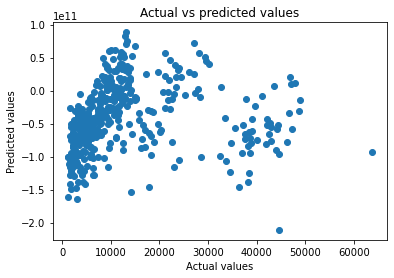

In [7]:

plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs predicted values")
plt.show()


A scatter plot of the actual vs predicted values, which can be useful for visually inspecting how well the model is performing.

### Mini-batch Gradient Descent

Mini-batch gradient descent is a hybrid approach that leverages the advantages of both batch gradient descent and stochastic gradient descent. It randomly selects a subset of feature vectors, typically of a pre-defined length n, and calculates the gradient based on this mini-batch. By doing so, it strikes a balance between the chaos of using only one feature vector for gradient computation and the excessive computational burden of using the entire dataset. Consequently, mini-batch gradient descent enhances efficiency and reduces computational complexity.


In [8]:
# Initialize the SGDRegressor model with mini-batch gradient descent
sgd_mini = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='invscaling', eta0=0.01)
sgd_mini.fit(X_train, y_train)
y_pred_mini = sgd_mini.predict(X_test)

mse_mini = mean_squared_error(y_test, y_pred_mini)
print("Mean squared error: ", mse_mini)


Mean squared error:  2.6012809872092293e+18


Compare the mse of mini-batch gradient descent with Stochastic Gradient Descent, Stochastic Gradient Descent fit the model better.